# Session 4 Exercises

In [1]:
import pandas as pd
import qeds

%matplotlib inline

### Unemployment Data Questions

In [2]:
## Load up the data -- this may take a couple seconds
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates=["Date"])
unemp_all = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
)

# Will only work with this subset of data
states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"
]
unemp = unemp_all[states]
unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


**Exercise**

Imagine that we want to determine whether unemployment was high (> 6.5),
medium (4.5 < x <= 6.5), or low (<= 4.5) for each state and each month.

1. Write a Python function that takes a single number as an input and
  outputs a single string noting if that number is high, medium, or low.  
1. Pass your function to `applymap` (quiz: why `applymap` and not
  `agg` or `apply`?) and save the result in a new DataFrame called
  `unemp_bins`.  
1. (Challenging) This exercise has multiple parts:  
  1. Use another transform on `unemp_bins` to count how many
    times each state had each of the three classifications.  
    - Hint 1: Will this value counting function be a Series or scalar
      transform?  
    - Hint 2: Try googling "pandas count unique value" or something
      similar to find the right transform.  
  1. Construct a horizontal bar chart of the number of occurrences of
    each level with one bar per state and classification (21 total
    bars).  
1. (Challenging) Repeat the previous step, but count how many states had
  each classification in each month. Which month had the most states
  with high unemployment? What about medium and low?  

In [3]:
# Part 1: Write a Python function to classify unemployment levels.
def unemployment_classifier(ur):
    if ur > 6.5:
        return "high"
    elif ur > 4.5:
        return "medium"
    else:
        return "low"

In [6]:
unemployment_classifier(4.8)

'medium'

In [8]:
# Part 2: Pass your function from part 1 to applymap
unemp_bins = unemp.applymap(unemployment_classifier)

In [9]:
unemp_bins

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,low,medium,low,low,low,medium,medium
2000-02-01,low,medium,low,low,low,medium,medium
2000-03-01,low,medium,low,low,low,medium,low
2000-04-01,low,medium,low,low,low,medium,low
2000-05-01,low,medium,low,low,low,medium,low
...,...,...,...,...,...,...,...
2017-08-01,medium,medium,low,medium,medium,medium,low
2017-09-01,medium,low,low,medium,medium,medium,low
2017-10-01,medium,low,low,medium,medium,medium,low


In [18]:
unemp_bin_counts = unemp_bins.apply(pd.Series.value_counts, axis=0)
unemp_bin_counts

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
high,75,106,68,91,142,65,51
low,44,4,69,19,17,22,58
medium,97,106,79,106,57,129,107


<AxesSubplot:>

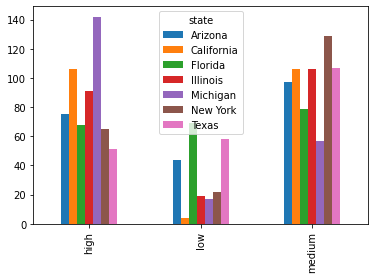

In [19]:
# Part 3: Count the number of times each state had each classification.
unemp_bin_counts.plot(kind="bar")

In [22]:
# Part 4: Apply the same transform from part 4, but to each date instead of to each state.
unemp_bin_counts_month = unemp_bins.apply(
    pd.Series.value_counts, axis="columns"
).fillna(0)

unemp_bin_counts_month

,high,low,medium
Date,,,
2000-01-01,0.0,4.0,3.0
2000-02-01,0.0,4.0,3.0
2000-03-01,0.0,5.0,2.0
2000-04-01,0.0,5.0,2.0
2000-05-01,0.0,5.0,2.0
...,...,...,...
2017-08-01,0.0,2.0,5.0
2017-09-01,0.0,3.0,4.0
2017-10-01,0.0,3.0,4.0


Which month had the most states with high unemployment? What about medium and low?

In [27]:
print(unemp_bin_counts_month["high"].idxmax())
print(unemp_bin_counts_month["medium"].idxmax())
print(unemp_bin_counts_month["low"].idxmax())

2009-04-01 00:00:00
2001-09-01 00:00:00
2000-08-01 00:00:00


In [29]:
unemp_bin_counts_month.agg(pd.Series.idxmax, axis="index")

high     2009-04-01
low      2000-08-01
medium   2001-09-01
dtype: datetime64[ns]

Python style conventions (including naming variables): https://www.python.org/dev/peps/pep-0008

**Exercise**

- For a single state of your choice, determine what the mean
  unemployment is during "Low", "Medium", and "High" unemployment times.  
  - Think about how you would do this for all the
    states in our sample and write your thoughts... We will soon
    learn tools that will *greatly* simplify operations like
    this that operate on distinct *groups* of data at a time.  
- Which states in our sample performs the best during "bad times?" To
  determine this, compute the mean unemployment for each state only for
  months in which the mean unemployment rate in our sample is greater
  than 7.  

In [34]:
unemp.loc[unemp_bins.loc[:, "Arizona"] == 'low', "Arizona"].mean()

4.0636363636363635

In [35]:
unemp.loc[unemp_bins.loc[:, "Arizona"] == 'medium', "Arizona"].mean()

5.436082474226807

In [36]:
unemp.loc[unemp_bins.loc[:, "Arizona"] == 'high', "Arizona"].mean()

8.73333333333333

### WDI Data Questions

In [37]:
url = "https://datascience.quantecon.org/assets/data/wdi_data.csv"
df = pd.read_csv(url)

wdi = df.set_index(["country", "year"])
wdiT = wdi.T

In [38]:
wdi.head()

GovExpend  Consumption   Exports   Imports       GDP
country year                                                      
Canada  2017   0.372665     1.095475  0.582831  0.600031  1.868164
        2016   0.364899     1.058426  0.576394  0.575775  1.814016
        2015   0.358303     1.035208  0.568859  0.575793  1.794270
        2014   0.353485     1.011988  0.550323  0.572344  1.782252
        2013   0.351541     0.986400  0.518040  0.558636  1.732714

**Exercise**

Try setting `my_df` to some subset of the rows in `wdi` (use one of the
`.loc` variations above).

Then see what happens when you do `wdi / my_df` or `my_df ** wdi`.

Try changing the subset of rows in `my_df` and repeat until you
understand what is happening.

In [49]:
# my_df = wdi.loc[pd.IndexSlice[["Canada", "Germany"], [2010, 2015, 2017]], :]
# Produce the same output
my_df = wdi.loc[(["Canada", "Germany"], [2010, 2015, 2017]), :]

my_df.head()

GovExpend  Consumption   Exports   Imports       GDP
country year                                                      
Canada  2010   0.347332     0.921952  0.469949  0.500341  1.613543
        2015   0.358303     1.035208  0.568859  0.575793  1.794270
        2017   0.372665     1.095475  0.582831  0.600031  1.868164
Germany 2010   0.653386     1.915481  1.443735  1.266126  3.417095
        2015   0.706115     2.033666  1.803081  1.527074  3.718482

In [55]:
foo = wdi / my_df

In [58]:
bar = wdi.divide(my_df)

In [65]:
wdi.head()

GovExpend  Consumption   Exports   Imports       GDP
country year                                                      
Canada  2017   0.372665     1.095475  0.582831  0.600031  1.868164
        2016   0.364899     1.058426  0.576394  0.575775  1.814016
        2015   0.358303     1.035208  0.568859  0.575793  1.794270
        2014   0.353485     1.011988  0.550323  0.572344  1.782252
        2013   0.351541     0.986400  0.518040  0.558636  1.732714

In [66]:
my_df.head()

GovExpend  Consumption   Exports   Imports       GDP
country year                                                      
Canada  2010   0.347332     0.921952  0.469949  0.500341  1.613543
        2015   0.358303     1.035208  0.568859  0.575793  1.794270
        2017   0.372665     1.095475  0.582831  0.600031  1.868164
Germany 2010   0.653386     1.915481  1.443735  1.266126  3.417095
        2015   0.706115     2.033666  1.803081  1.527074  3.718482

In [64]:
wdi.divide(my_df, fill_value=1)

GovExpend  Consumption   Exports   Imports        GDP
country       year                                                       
Canada        2000   0.270553     0.677713  0.499526  0.380823   1.342805
              2001   0.279767     0.694230  0.484696  0.362023   1.366590
              2002   0.286094     0.721974  0.490465  0.368615   1.407725
              2003   0.294335     0.741796  0.481993  0.384199   1.433089
              2004   0.299854     0.764357  0.508657  0.416754   1.477317
...                       ...          ...       ...       ...        ...
United States 2013   2.353381    10.687214  2.118639  2.600198  15.853796
              2014   2.334071    11.000619  2.209555  2.732228  16.242526
              2015   2.373130    11.409800  2.222228  2.881337  16.710459
              2016   2.407981    11.722133  2.219937  2.936004  16.972348
              2017   2.405743    12.019266  2.287071  3.069954  17.348627

[72 rows x 5 columns]

In [68]:
(wdi / my_df).fillna(0.0)  # Fills with just 0s

GovExpend  Consumption  Exports  Imports  GDP
country       year                                               
Canada        2000        0.0          0.0      0.0      0.0  0.0
              2001        0.0          0.0      0.0      0.0  0.0
              2002        0.0          0.0      0.0      0.0  0.0
              2003        0.0          0.0      0.0      0.0  0.0
              2004        0.0          0.0      0.0      0.0  0.0
...                       ...          ...      ...      ...  ...
United States 2013        0.0          0.0      0.0      0.0  0.0
              2014        0.0          0.0      0.0      0.0  0.0
              2015        0.0          0.0      0.0      0.0  0.0
              2016        0.0          0.0      0.0      0.0  0.0
              2017        0.0          0.0      0.0      0.0  0.0

[72 rows x 5 columns]

In [71]:
fill_vals = {
    "GovExpend": 0,
    "Consumption": 1,
    "Exports": 2,
    "Imports": 3,
    "GDP": 4
}

# Fills with value from associated dictionary
(wdi / my_df).fillna(fill_vals)

GovExpend  Consumption  Exports  Imports  GDP
country       year                                               
Canada        2000        0.0          1.0      2.0      3.0  4.0
              2001        0.0          1.0      2.0      3.0  4.0
              2002        0.0          1.0      2.0      3.0  4.0
              2003        0.0          1.0      2.0      3.0  4.0
              2004        0.0          1.0      2.0      3.0  4.0
...                       ...          ...      ...      ...  ...
United States 2013        0.0          1.0      2.0      3.0  4.0
              2014        0.0          1.0      2.0      3.0  4.0
              2015        0.0          1.0      2.0      3.0  4.0
              2016        0.0          1.0      2.0      3.0  4.0
              2017        0.0          1.0      2.0      3.0  4.0

[72 rows x 5 columns]

In [57]:
foo.divide?

In [54]:
foo.loc[my_df.index, :]

GovExpend  Consumption  Exports  Imports  GDP
country year                                               
Canada  2010        1.0          1.0      1.0      1.0  1.0
        2015        1.0          1.0      1.0      1.0  1.0
        2017        1.0          1.0      1.0      1.0  1.0
Germany 2010        1.0          1.0      1.0      1.0  1.0
        2015        1.0          1.0      1.0      1.0  1.0
        2017        1.0          1.0      1.0      1.0  1.0

**Exercise**

Use `pd.IndexSlice` to extract all data from `wdiT` where the `year`
level of the column names (the second level) is one of 2010, 2012, and 2014


In [73]:
wdiT.loc[:, pd.IndexSlice[:, [2010, 2012, 2014]]]

country        Canada                       Germany                      \
year             2014      2012      2010      2014      2012      2010   
GovExpend    0.353485  0.354342  0.347332  0.685990  0.666454  0.653386   
Consumption  1.011988  0.961226  0.921952  1.999953  1.967390  1.915481   
Exports      0.550323  0.505969  0.469949  1.712270  1.607455  1.443735   
Imports      0.572344  0.547756  0.500341  1.445409  1.354122  1.266126   
GDP          1.782252  1.693428  1.613543  3.654924  3.559587  3.417095   

country     United Kingdom                     United States             \
year                  2014      2012      2010          2014       2012   
GovExpend         0.538888  0.528194  0.521146      2.334071   2.398873   
Consumption       1.675716  1.612550  1.598563     11.000619  10.534042   
Exports           0.774022  0.745484  0.690824      2.209555   2.045509   
Imports           0.827311  0.772692  0.745065      2.732228   2.560677   
GDP               2.657159  2.529323  2.452900     16.242526  15.567038   

country                 
year              2010  
GovExpend     2.510143  
Consumption  10.185836  
Exports       1.846280  
Imports       2.360183  
GDP          14.992053

In [74]:
idx = pd.IndexSlice[:, [2010, 2012, 2014]]
wdiT.loc[:, idx]

country        Canada                       Germany                      \
year             2014      2012      2010      2014      2012      2010   
GovExpend    0.353485  0.354342  0.347332  0.685990  0.666454  0.653386   
Consumption  1.011988  0.961226  0.921952  1.999953  1.967390  1.915481   
Exports      0.550323  0.505969  0.469949  1.712270  1.607455  1.443735   
Imports      0.572344  0.547756  0.500341  1.445409  1.354122  1.266126   
GDP          1.782252  1.693428  1.613543  3.654924  3.559587  3.417095   

country     United Kingdom                     United States             \
year                  2014      2012      2010          2014       2012   
GovExpend         0.538888  0.528194  0.521146      2.334071   2.398873   
Consumption       1.675716  1.612550  1.598563     11.000619  10.534042   
Exports           0.774022  0.745484  0.690824      2.209555   2.045509   
Imports           0.827311  0.772692  0.745065      2.732228   2.560677   
GDP               2.657159  2.529323  2.452900     16.242526  15.567038   

country                 
year              2010  
GovExpend     2.510143  
Consumption  10.185836  
Exports       1.846280  
Imports       2.360183  
GDP          14.992053

In [80]:
wdi

GovExpend  Consumption   Exports   Imports        GDP
country       year                                                       
Canada        2017   0.372665     1.095475  0.582831  0.600031   1.868164
              2016   0.364899     1.058426  0.576394  0.575775   1.814016
              2015   0.358303     1.035208  0.568859  0.575793   1.794270
              2014   0.353485     1.011988  0.550323  0.572344   1.782252
              2013   0.351541     0.986400  0.518040  0.558636   1.732714
...                       ...          ...       ...       ...        ...
United States 2004   2.267999     9.311431  1.335978  2.108585  13.846058
              2003   2.233519     8.974708  1.218199  1.892825  13.339312
              2002   2.193188     8.698306  1.192180  1.804105  12.968263
              2001   2.112038     8.480461  1.213253  1.740797  12.746262
              2000   2.040500     8.272097  1.287739  1.790995  12.620268

[72 rows x 5 columns]

In [81]:
wdi_melted = wdi.reset_index().melt(id_vars=["country", "year"])
wdi_melted

,country,year,variable,value
0,Canada,2017,GovExpend,0.372665
1,Canada,2016,GovExpend,0.364899
2,Canada,2015,GovExpend,0.358303
3,Canada,2014,GovExpend,0.353485
4,Canada,2013,GovExpend,0.351541
...,...,...,...,...
355,United States,2004,GDP,13.846058
356,United States,2003,GDP,13.339312
357,United States,2002,GDP,12.968263
358,United States,2001,GDP,12.746262


In [85]:
wdi_melted.pivot(index=["country", "year"], columns="variable", values="value")

variable            Consumption   Exports        GDP  GovExpend   Imports
country       year                                                       
Canada        2000     0.677713  0.499526   1.342805   0.270553  0.380823
              2001     0.694230  0.484696   1.366590   0.279767  0.362023
              2002     0.721974  0.490465   1.407725   0.286094  0.368615
              2003     0.741796  0.481993   1.433089   0.294335  0.384199
              2004     0.764357  0.508657   1.477317   0.299854  0.416754
...                         ...       ...        ...        ...       ...
United States 2013    10.687214  2.118639  15.853796   2.353381  2.600198
              2014    11.000619  2.209555  16.242526   2.334071  2.732228
              2015    11.409800  2.222228  16.710459   2.373130  2.881337
              2016    11.722133  2.219937  16.972348   2.407981  2.936004
              2017    12.019266  2.287071  17.348627   2.405743  3.069954

[72 rows x 5 columns]

In [86]:
wdi_melted.pivot_table?